 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
"""
INSTRUCTOR NOTES:

When algo_returns.csv and whale_analysis.ipynb are in the same directory, this code works.

NOTE:
1. Its always best to do things incrementally, try reading one file at a time first.
2. I got a different error because there was no "date" column. The index column is named "Date".
   Columns names (like files) are case sensitive. ALWAYS look at the data first! 

"""

# Reading whale returns

whale_data = Path("whale_returns.csv")

whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.columns = whale_df.columns.str.replace('[&]','')
whale_df.columns = whale_df.columns.str.replace('[.]', '')

whale_df.rename(columns = {'PAULSON  COINC ': 'PAULSONCOINC'}, inplace = True)

whale_df

,SOROS FUND MANAGEMENT LLC,PAULSONCOINC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls

whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSONCOINC                   1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSONCOINC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("algo_returns.csv")

algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)

algo_df.isnull().sum()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("sp500_history.csv")

sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_df.sort_index(inplace=True)

sp500_df['Close'] = sp500_df['Close'].str.replace("$", '').astype(float)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns

sp_returns = sp500_df.pct_change()

sp_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp_returns.isna().sum()

Close    1
dtype: int64

In [13]:
sp_returns.dropna(inplace = True)

sp_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns.rename(columns= {'Close': 'SP500 Close'}, inplace = True)
sp_returns

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
my_portfolio = pd.concat([whale_df, algo_df, sp_returns], axis = 'columns', join = 'inner')
my_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSONCOINC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':"All Porfolio's Daily Returns"}, xlabel='Date'>

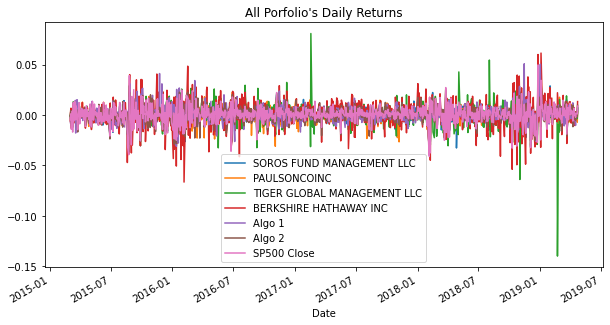

In [16]:
# Plot daily returns of all portfolios

my_portfolio.plot(figsize=(10,5),  title="All Porfolio's Daily Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':"All Porfolio's Cumulative Returns"}, xlabel='Date'>

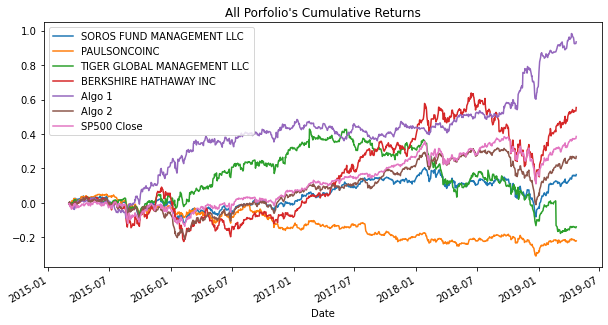

In [17]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + my_portfolio).cumprod() - 1
cumulative_returns

cumulative_returns.plot(figsize=(10,5), title="All Porfolio's Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

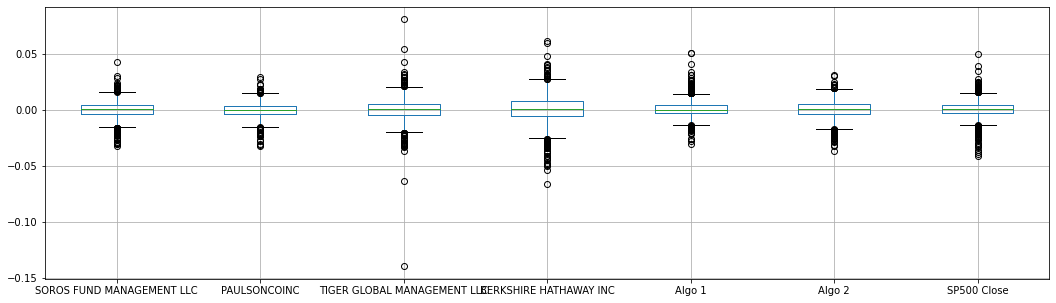

In [18]:
# Box plot to visually show risk

my_portfolio.boxplot(figsize =(18,5))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
my_portfolio_volatility = my_portfolio.std()

my_portfolio_volatility.sort_values()

PAULSONCOINC                   0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500 Close                    0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

greater_risk = ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

# Determine which portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
volatility = my_portfolio.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSONCOINC                   0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500 Close                    0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD For 21 Days'}, xlabel='Date'>

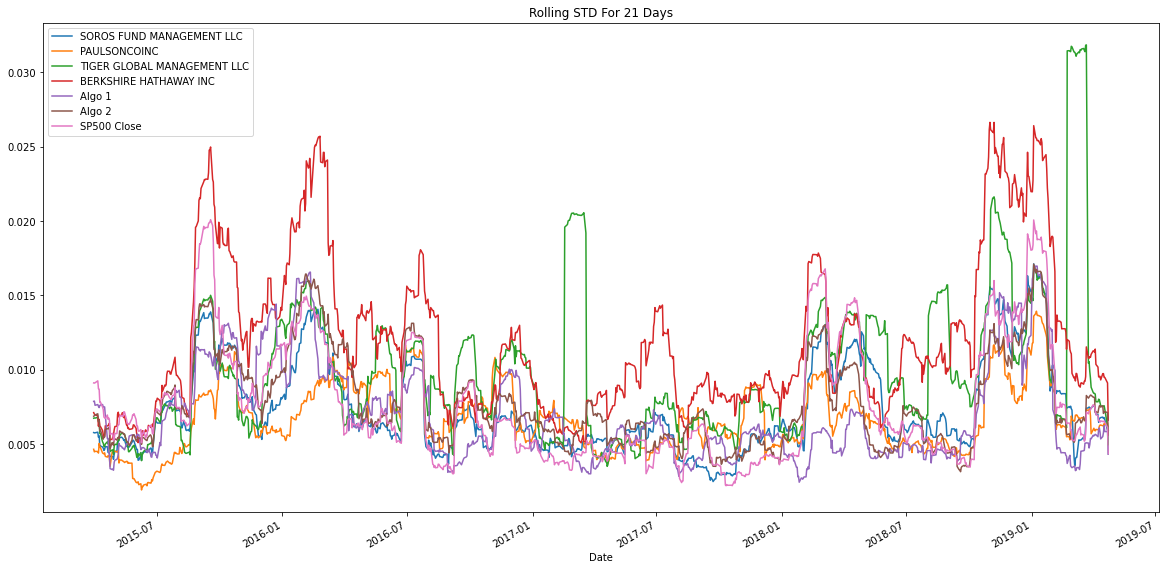

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
my_portfolio.rolling(window=21).std().plot(figsize =(20,10), title="Rolling STD For 21 Days")

# Plot the rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

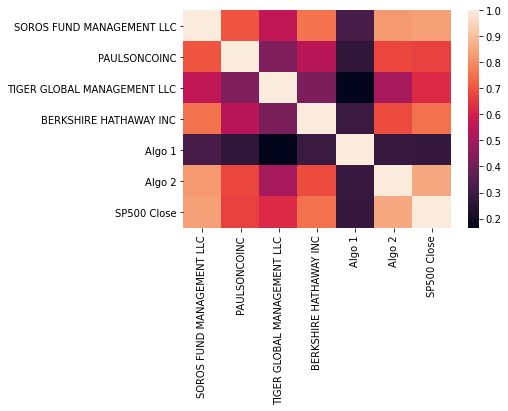

In [23]:
# Calculate the correlation
price_correlation = my_portfolio.corr()

# Display de correlation matrix

sns.heatmap(price_correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500

soros_covariance = my_portfolio['SOROS FUND MANAGEMENT LLC'].cov(my_portfolio['SP500 Close'])
paulson_covariance = my_portfolio['PAULSONCOINC'].cov(my_portfolio['SP500 Close'])
tiger_covariance = my_portfolio['TIGER GLOBAL MANAGEMENT LLC'].cov(my_portfolio['SP500 Close'])
berkshire_covariance = my_portfolio['BERKSHIRE HATHAWAY INC'].cov(my_portfolio['SP500 Close'])
algo1_covariance = my_portfolio['Algo 1'].cov(my_portfolio['SP500 Close'])
algo2_covariance = my_portfolio['Algo 2'].cov(my_portfolio['SP500 Close'])


variance = my_portfolio['SP500 Close'].var()
variance


# Computing beta

soros_beta = soros_covariance / variance
paulson_beta = paulson_covariance / variance
tiger_beta = tiger_covariance / variance
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance
berkshire_beta = berkshire_covariance / variance


print(f'The Beta of Algo 2 is {algo2_beta}\n\
The Beta of Algo 1 is {algo1_beta}\n \
The Beta of Tiger is {tiger_beta}\n \
The Beta of Berkshire is {berkshire_beta},\n \
The Beta of Soros is {soros_beta}\n \
The Beta of paulson is {paulson_beta}\n \
The Beta of Berkshire is {berkshire_beta}\n \
')

The Beta of Algo 2 is 0.8375345402757784
The Beta of Algo 1 is 0.24899091459425746
 The Beta of Tiger is 0.7946528805681053
 The Beta of Berkshire is 1.1347891297491728,
 The Beta of Soros is 0.7733753547794657
 The Beta of paulson is 0.5498861853574536
 The Beta of Berkshire is 1.1347891297491728
 


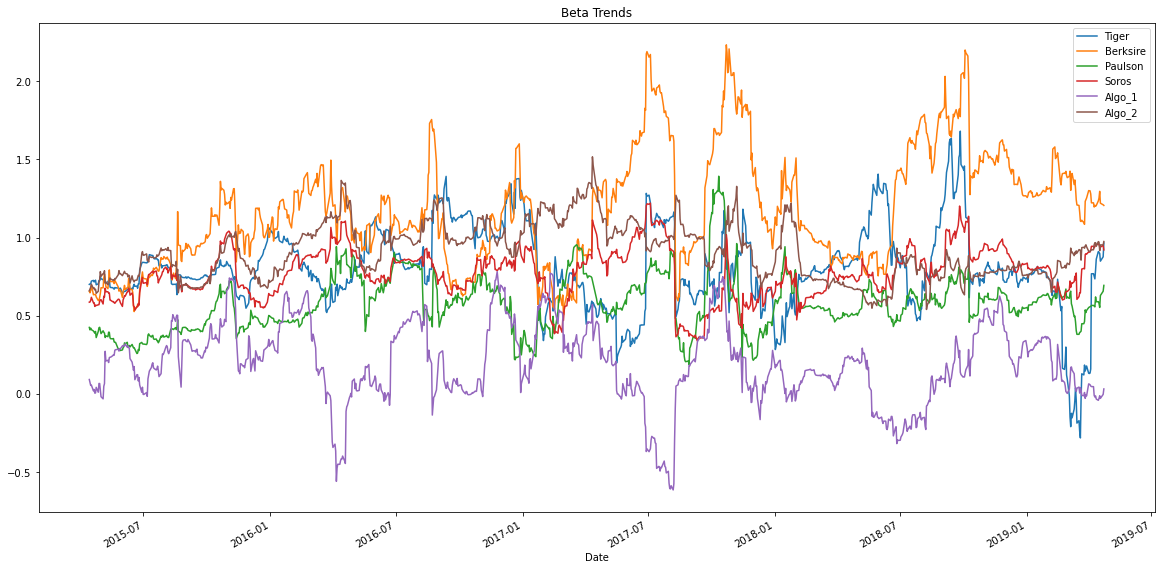

In [25]:
rolling_covariance_tiger = my_portfolio['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 30).cov(my_portfolio['SP500 Close'])
rolling_covariance_berkshire = my_portfolio['BERKSHIRE HATHAWAY INC'].rolling(window = 30).cov(my_portfolio['SP500 Close'])
rolling_covariance_paulson = my_portfolio['PAULSONCOINC'].rolling(window = 30).cov(my_portfolio['SP500 Close'])
rolling_covariance_soros = my_portfolio['SOROS FUND MANAGEMENT LLC'].rolling(window = 30).cov(my_portfolio['SP500 Close'])
rolling_covariance_algo_1 = my_portfolio['Algo 1'].rolling(window = 30).cov(my_portfolio['SP500 Close'])
rolling_covariance_algo_2 = my_portfolio['Algo 2'].rolling(window = 30).cov(my_portfolio['SP500 Close'])


rolling_variance = my_portfolio['SP500 Close'].rolling(window = 30).var()


rolling_beta_tiger = rolling_covariance_tiger / rolling_variance
rolling_beta_berkshire = rolling_covariance_berkshire / rolling_variance
rolling_beta_paulson = rolling_covariance_paulson / rolling_variance
rolling_beta_soros = rolling_covariance_soros / rolling_variance
rolling_beta_algo_1 = rolling_covariance_algo_1 / rolling_variance
rolling_beta_algo_2 = rolling_covariance_algo_2 / rolling_variance

plot_1 = rolling_beta_tiger.plot(figsize = (20,10), title="Beta Trends")
rolling_beta_berkshire.plot(ax=plot_1)
rolling_beta_paulson.plot(ax=plot_1)
rolling_beta_soros.plot(ax=plot_1)
rolling_beta_algo_1.plot(ax=plot_1)
rolling_beta_algo_2.plot(ax=plot_1)
plot_1.legend(['Tiger','Berksire','Paulson','Soros','Algo_1','Algo_2'])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

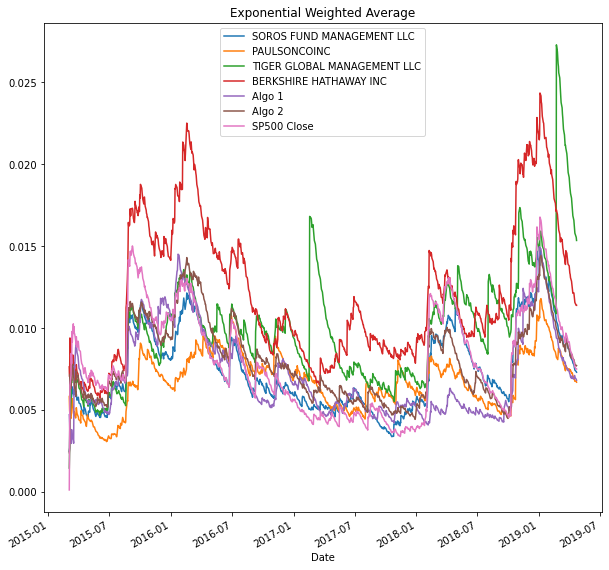

In [26]:
# Use `ewm` to calculate the rolling window

times = {"2019-05-09":"2019-26-09"}

my_portfolio.ewm(halflife=21).std().plot(figsize=(10,10), title = 'Exponential Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios

sharpe_ratios = (my_portfolio.mean() * 252) / (my_portfolio.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSONCOINC                  -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500 Close                    0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

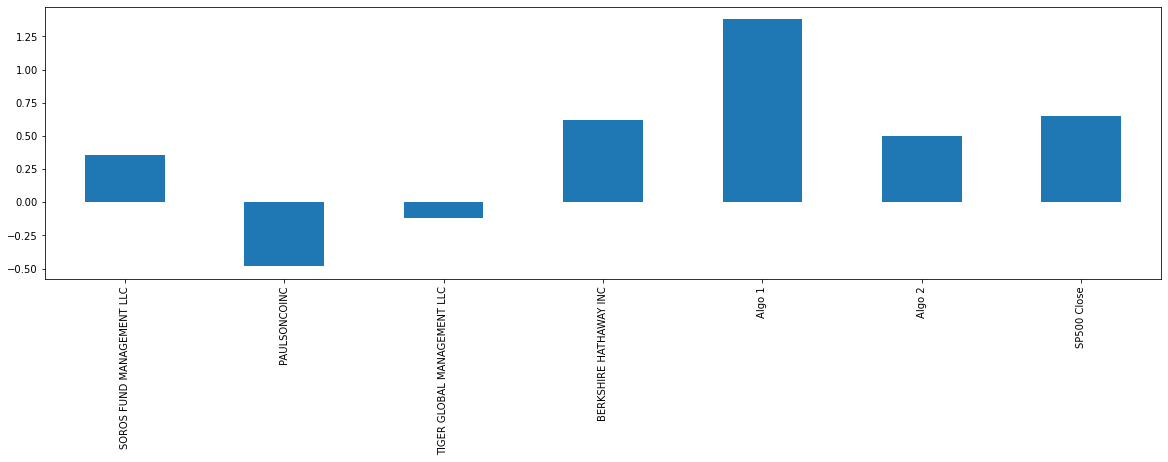

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 did, by far, algo 2 however; not so much.  This is very helpful determining not only which algo is performing better but algo how it performs against the S&P and other stocks!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
# goog_historical = Path("goog_historical.csv")
# goog_df = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
# goog_df


goog_csv = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)
goog_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [30]:
# Reading data from 2nd stock
aapl_historical = Path("aapl_historical.csv")
aapl_df = pd.read_csv(aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)
aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [31]:
# Reading data from 3rd stock
cost_csv = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)
cost_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [32]:
# Combine all stocks in a single DataFrame

kt_portfolio = pd.concat([aapl_df, goog_df, cost_df], axis = 'columns', join = 'inner')
kt_portfolio

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [33]:
# Reset Date index
kt_portfolio.reset_index()

,Trade DATE,AAPL,GOOG,COST
0,2019-05-09,200.72,1162.38,243.47
1,2019-05-08,202.90,1166.27,241.34
2,2019-05-07,202.86,1174.10,240.18
3,2019-05-06,208.48,1189.39,244.23
4,2019-05-03,211.75,1185.40,244.62
...,...,...,...,...
245,2018-05-17,186.99,1078.59,199.60
246,2018-05-16,188.18,1081.77,198.71
247,2018-05-15,186.44,1079.23,195.48
248,2018-05-14,188.15,1100.20,195.88


In [34]:
# Reorganize portfolio data by having a column per symbol
#kt_portfolio.rename(columns={kt_portfolio.columns[1]: "AAPL"})
#kt_portfolio.rename(columns={kt_portfolio.columns[3]: "GOOG"})
#kt_portfolio.rename(columns={kt_portfolio.columns[5]: "COST"})

# kt_portfolio.columns.drop[('Symbol')]
# kt_portfolio.columns = ['AAPL','','GOOG','','COST','']


# kt_portfolio.reindex(columns= ['index','Trade DATE','AAPL', 'COST','GOOG'])
# kt_portfolio

combined_df = kt_portfolio.reindex(columns=['AAPL', 'COST','GOOG'],)
combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [35]:
# Calculate daily returns

daily_returns = combined_df.pct_change()


# Drop NAs
daily_returns.isna().sum()
daily_returns.dropna(inplace = True)
daily_returns.head()


# Display sample data
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# # Set weights
# #weights = [1/3, 1/3, 1/3]
# weights = [0.33, 0.33, 0.33]
# # Calculate portfolio return

# daily_returns.dot(weights)

# # Display sample data
# daily_returns.head()




# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)

# Calculate portfolio return
custom = pd.DataFrame(portfolio_returns)

# Display sample data
custom.head()

,0
Trade DATE,
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642
2019-05-02,-0.013131


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# Join your returns DataFrame to the original returns DataFrame
# new_df = daily_returns



new_df = pd.concat([portfolio_returns, my_portfolio], axis='columns', join='inner')
new_df.rename(columns= {0: "Custom"},inplace = True )
new_df.sort_index()
new_df

,Custom,SOROS FUND MANAGEMENT LLC,PAULSONCOINC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new_df = pd.concat([portfolio_returns, my_portfolio], axis='columns', join='inner')
new_df.rename(columns= {0: "Custom"},inplace = True )
new_df.dropna(inplace=True)
new_df.sort_index()
new_df.head()



# new_df.dropna(inplace=True)
new_df

,Custom,SOROS FUND MANAGEMENT LLC,PAULSONCOINC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [58]:
# Calculate the annualized `std`
# volatility = kt_portfolio.std() * np.sqrt(252)
# volatility.sort_values(inplace=True)
# volatility


new_df.std()
annualized_variance = (new_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

Custom                         0.212687
SOROS FUND MANAGEMENT LLC      0.146455
PAULSONCOINC                   0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
SP500 Close                    0.151739
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD For 21 Days'}>

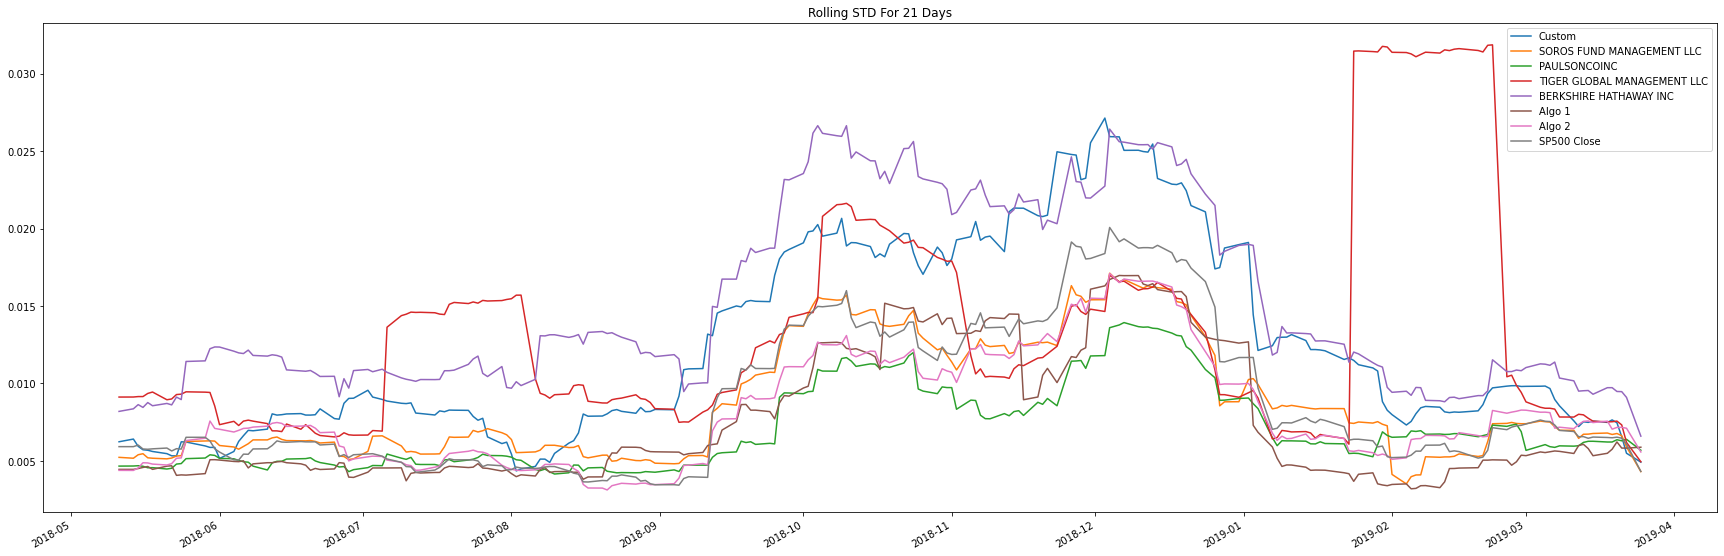

In [59]:
# Calculate rolling standard deviation
new_df.rolling(window=21).std().plot(figsize =(30,10), title="Rolling STD For 21 Days")

# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

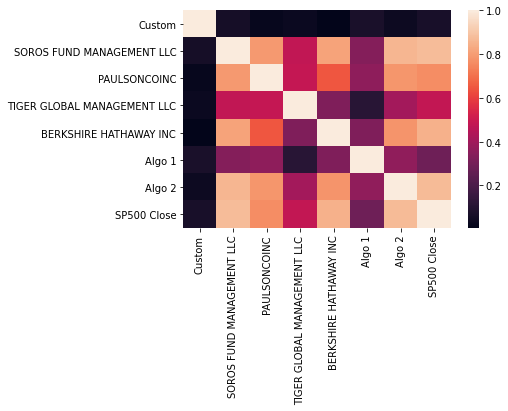

In [60]:
# Calculate and plot the correlation
price_correlation = new_df.corr()

# Display de correlation matrix

sns.heatmap(price_correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}>

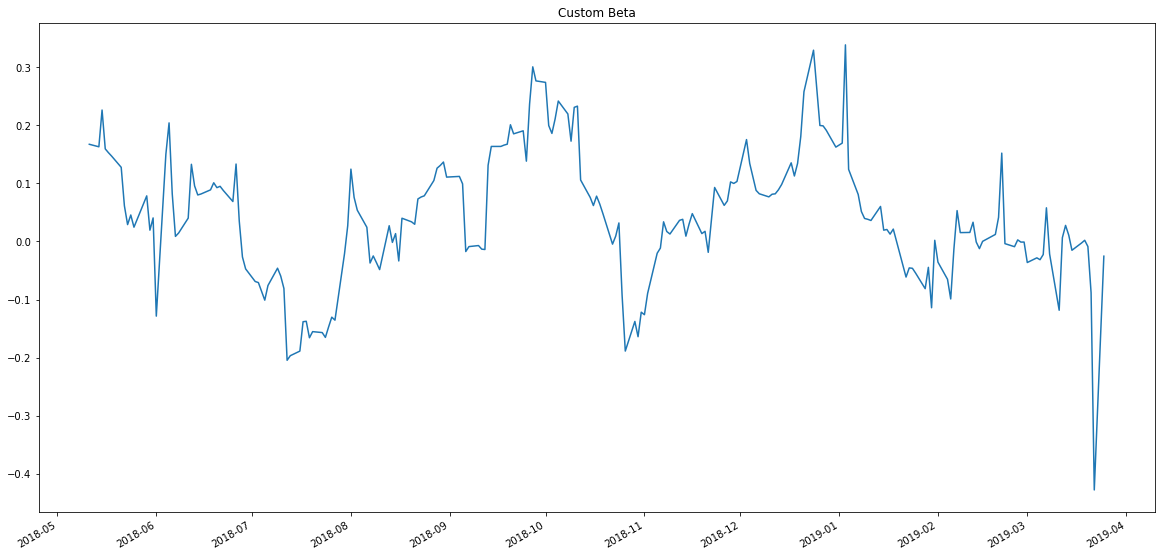

In [61]:
# Calculate and plot Beta

rolling_variance = new_df['Custom'].rolling(window=21).var()
rolling_covariance = new_df['Custom'].rolling(window=21).cov(new_df['SP500 Close'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Custom Beta')


# rolling_variance = combined_pt3['Custom'].rolling(window=21).var()
# rolling_covariance = combined_pt3['Custom'].rolling(window=21).cov(combined_pt3['SP500'])
# rolling_beta = rolling_covariance / rolling_variance
# rolling_beta.plot(figsize=(20, 10), title='Custom Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios = (new_df.mean() * 252) / (new_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.019946
Custom                        -0.614330
Algo 2                         0.082577
BERKSHIRE HATHAWAY INC         0.141691
PAULSONCOINC                   0.267115
SOROS FUND MANAGEMENT LLC      0.395449
SP500 Close                    0.595486
Algo 1                         2.034208
dtype: float64

<AxesSubplot:title={'center':'Final Returns Compared'}>

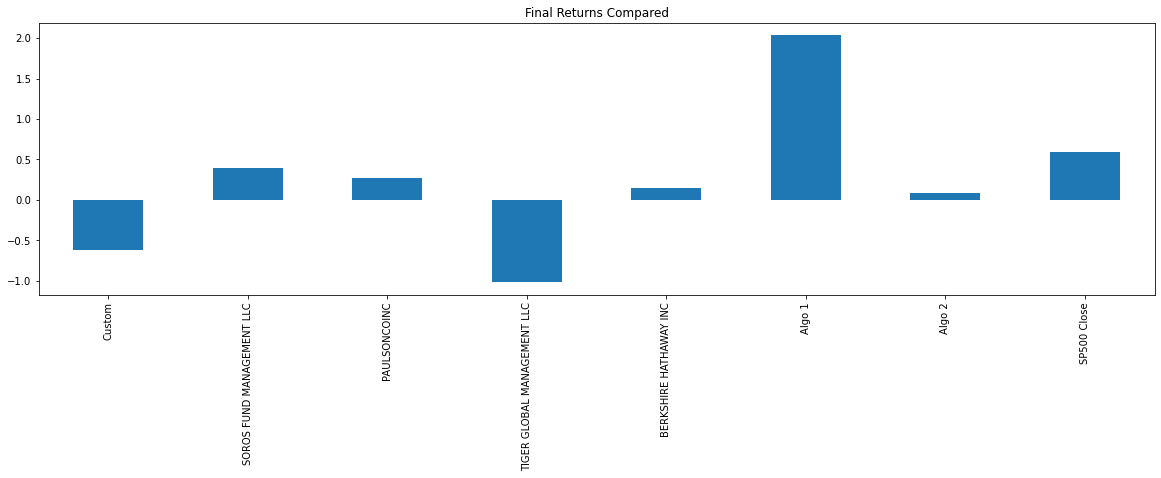

In [65]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,5), title = 'Final Returns Compared')


### How does your portfolio do?

Write your answer here!

According to this chart, my portfolio doesnt do very well!  Not the worst, but not great either! Algo 1 killed it!